# Биноминальное тестирование

Биноминальное тестирование полезно при сопоставлении частоты некоторого результата в выборке к ожидаемой вероятности данного результата. Например, если мы ожидаем что 90% пассажиров с билетами прибудут на своей рейс но только 80 из 100 пассажиров пришло по факту, в таком случае мы можем использовать биноминальное тестирование для понимания значительности различия 80 от 90.

Биноминальное тестирование схоже с one-sample t-test в том что они тестируют статистику выборки вместо некоторого уровня ожидания популяции. Различия в том что:
- биноминальное тестирование используется в бинарных категорийных данных для сравнения частоты выборки с ожидаемым уровнем вероятности популяции
- one-sample t-test используется для числовых данных для сравнения среднего значения выборки с ожидаемым средним значением популяции

Для практической работы используется набор данных ./files/monthly_report.csv

In [2]:
import pandas as pd

# загрузим данные из файла
monthly_report = pd.read_csv('./files/monthly_report.csv')

# выведем несколько строк данных
print(monthly_report.head())

             timestamp purchase                       item
0  2020-01-17 17:23:06        y  cue cards - love actually
1  2020-01-25 17:09:39        n                        NaN
2  2020-01-25 05:22:01        n                        NaN
3  2020-01-18 04:33:40        y      t-rex - jurassic park
4  2020-01-24 17:24:52        n                        NaN


## Сводная таблица выборки

Данные в файлах описывают продажи компании Live-it-LIVE.

Департамент маркетинга предоставила отчет о том что, в настоящий момент в этом году, около 10% посетителей сайта делают покупку.

Месячный отчет показывает каждого посетителя сайта и делал или не делал ли он покупку. Данный вебсайт по подтверждению покупки имеет небольшой баг в этом месяце, таким образом департамент бизнеса хочет знать сильно ли уровень покупок опустился ниже ождаемого. Они попросили нас заняться данным вопросом.

Прежде чем приступать к тестирование гипотезы, для начала нам необходимо знать две вещи о данных:
- Кол-во людей посетивших сайт
- Кол-во людей совершивших покупку на сайте

Предположим что каждая строка данных представляет собой уникального посетителя, мы можем посчитать кол-во людей которые посетили сайт путем подсчета строк в наборе данных. Далее мы можем посчитать кол-во пользователей которые сделали покупку используя условия и суммирование.

In [3]:
# рассчитайте кол-во строк в наборе данных
sample_size = len(monthly_report)

print(sample_size)

500


In [4]:
# рассчитайте кол-во пользователей совершивших покупку
num_purchased = len(monthly_report[monthly_report.purchase == 'y'])

print(num_purchased)

41


## Моделирование случайности

Исходя из данных об ожидаемых покупках (10%) получаем что на 500 пользователей должно быть совершенно 50 покупок.

Сильно ли показатель 41 отличается от 50?

Чтобы понять почему наше ожидаемое значение (50) и наблюдаемое значение (41) могут быть не равны - даже если не было падения вероятности покупки - давайте обратимся к обычному примеру вероятности: подбрасыванию монеты. Мы можем смоделировать подбрасывание монеты используя функцию **numpy.random.choice()**

Если мы подбрасываем монетку 10 раз подряд, мы ожидаем что 5 результатов будет "орел". По той причине что это случайны процесс, мы не можем гарантировать что абсолютно точно половина подбросов монеты будет "орлом". Применяя данное правило к нашему примеру ожидаемое значение в 10% не говорит о том что мы получим абсолютно 10% процентов продаж на выборку.

In [5]:
# по средствам специальной функции смоделируйте ситуацию продаж с шансов в 10% и присвоейте результат перевенной one_visitor
import numpy as np

one_visitor = np.random.choice(['y','n'], size =1 , p=[0.1, 0.9])

print(one_visitor)

['n']


In [6]:
# теперь смоделируйте список из случайных значений величиной 500 элементов по примеру выше и присвоейте результат переменной simulated_monthly_visitors
simulated_monthly_visitors = np.random.choice(['y','n'], size=500, p=[.1, .9])

print(simulated_monthly_visitors)

['n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'y' 'n' 'n' 'n' 'n' 'n' 'n' 'n'
 'n' 'y' 'n' 'y' 'y' 'n' 'n' 'y' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n'
 'n' 'n' 'n' 'y' 'n' 'y' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n'
 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'y' 'n' 'n' 'n' 'n' 'n'
 'n' 'n' 'n' 'y' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n'
 'n' 'n' 'n' 'n' 'y' 'n' 'n' 'n' 'n' 'n' 'y' 'n' 'n' 'n' 'n' 'n' 'n' 'n'
 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'y' 'n'
 'n' 'n' 'n' 'n' 'n' 'n' 'y' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'y' 'n' 'n' 'n'
 'n' 'n' 'n' 'n' 'y' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n'
 'y' 'n' 'n' 'n' 'y' 'n' 'n' 'y' 'y' 'y' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n'
 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n'
 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'y' 'n' 'y' 'n' 'n' 'y' 'n' 'n'
 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'y' 'n' 'n' 'n' 'y' 'n'
 'n' 'n' 'n' 'n' 'n' 'n' 'y' 'n' 'n' 'n' 'n' 'n' 'n

## Моделирование нулевого распределения

Первыш шагом для тестирования гипотезы это формирования нулевой гипотезы. Для вопроса насколько отличается уровень продаж компании от 10% в этом месяце, нулевая гипотеза описывает мир в которого верна вероятность что точно 10% посетителей совершают покупки, но используя случайный шанс, мы наблюдаем что только 41 посетитель (8.2%) совершают покупку.

Давайте вернемся к примеру с подбросом монеты. Мы можем смоделировать 10 подбросов монеты и вывести на экран кол-во "орлов" из этих 10 подбросов. Если запускать один и тот же код несколько раз, мы увидем что каждый раз результат различный. Это даст нам ощущение что существует диапазон кол-ва значений которые могут появится случайным образом, даже если это простая монета.

In [7]:
# используя блок кода выше посчитайте кол-во покупок и запишите данное значение в переменную num_purchased
simulated_monthly_visitors = np.random.choice(['y','n'], size=500, p=[.1, .9])

num_purchased = np.sum(simulated_monthly_visitors == 'y')

print(num_purchased)

31


In [8]:
# используя цикл и блок кода выше вычислите кол-во пользователей которые совершили покупку 10000 раз и записывайте каждый результат в переменную null_outcomes методом append
null_outcomes = []

for i in range(10000):
    simulated_monthly_visitors = np.random.choice(['y','n'], size=500, p=[.1, .9])

    num_purchased = np.sum(simulated_monthly_visitors == 'y')

    null_outcomes.append(num_purchased)

# вычислите минимальное и максимальное значения списка null_outcomes
null_min = np.min(null_outcomes)
null_max = np.max(null_outcomes)

print(null_min, null_max)

28 79


## Исследование нулевого распределения

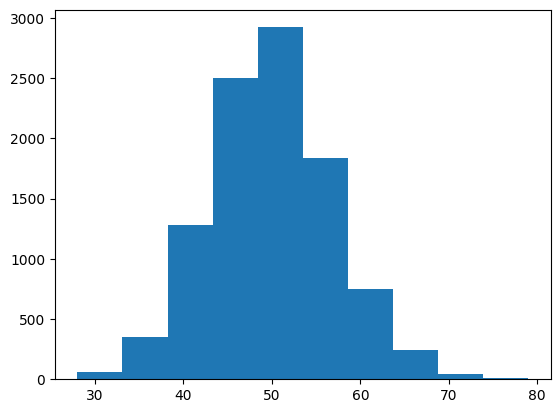

<Figure size 640x480 with 0 Axes>

In [9]:
# составьте диаграмму нулевого распределения
import matplotlib.pyplot as plt

plt.hist(null_outcomes)
plt.show()
plt.clf()

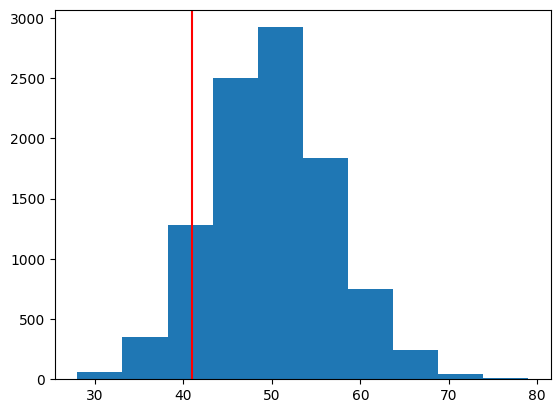

In [10]:
# используя метод plt.axvline() отобразите на диаграмме среднее значение набора данных компании (41)
plt.hist(null_outcomes)
plt.axvline(41, color='r')
plt.show()
plt.close()

## Доверительный интервал

Недавно мы рассчитали что значение варьируются в диапазоне от 24 до 76 покупок на 500 посетителей, но экстремальные значения случались очень редко.

Сообщая об интервале, охватывающем 95% значений вместо полного диапазона, мы можем сказать что-то вроде: "мы на 95% уверены, что если каждый посетитель имеет 10%-ую вероятность совершить покупку, случайная выборка из 500 посетителей совершит от 37 до 63 покупок". Мы можем использовать функцию np.percentile() для расчета этого 95%-го интервала следующим образом

`np.percentile(outcomes, [2.5, 97.5])`

Мы рассчитали 2.5-й и 97.5-й процентили так, чтобы ровно 5% данных выпадало за пределы этих процентилей (2.5% выше 97.5-ого процентиля и 2.5% ниже 2.5-го процентиля). Это дает нам диапазон, охватывающий 95% данных.

Если наша наблюдаемая статистика выходит за пределы этого интервала, мы можем заключить, что нулвая гипотеза маловероятна. В этом примере, поскольку 41 попадает в интервал 95%, по-прежнему вполне вероятно, что мы наблюдали более низкую скорость покупок по случайности, даже если нулвая гипотеза была верна.

In [11]:
# рассчитайте интервал покарывающий 90% результатов переменной null_outcomes
# запишите значение в переменную null_90CI
null_90CI = np.percentile(null_outcomes, [5, 95])

print(null_90CI)

[39. 62.]


## Расчет One-Sided P-Value 

In [12]:
# на основе рассчитанных данных получите значение вероятности того что значение будет равно или ниже 41
# запишите данное значение в переменную p_value
null_outcomes = np.array(null_outcomes)
p_value = np.sum(null_outcomes <= 41) / len(null_outcomes)

print(p_value)

0.1033


# Расчет Two-Sided P-value

In [ ]:
# на основе полученных ранее данных null_outcomes рассчитайте значение two-sided p-value
# с ожидаемым значением в 10% (50) фактическое значение продаж которое было полученно 41
# следовательно нам необходимо расчитать пропорцию суммы значений ниже или равному 41 и выше равному 50 + (50-41) = 59
# сохраните значение в переменной p-value и выведите его значение

p_value = np.sum((null_outcomes <= 41) | (null_outcomes >= 59)) / len(null_outcomes)

print(p_value)
# обратите внимание что значение в данном случае в два раза больше предыдущего и это легко объяснить тем что мы взяли два равных диапазона с двух разных концов
# также прошу обратить внимание что каждое условие обрамляется круглыми скобками а знак pipeline | заменяет условный оператор OR (ИЛИ)

0.2077


# Написание функции биноминального тестирования

На данный момент мы провели смоделированную проверку биноминальной гипотезы для компании. Воспользовавшись блоками кода выше напишем собственную функцию биноминального тестирования.

Наша функция будет использовать моделирование, поэтому она будет оценивать (хоть и довольно точно) те же p-values, которые мы получили бы, используя гораздо более сложные математические уравнения.

In [ ]:
# функция создана в файле my_funcs.py
from scipy.stats import binomtest
import my_funcs as mf


# воспользовавшись нашей функцией указав теже параметры что и в коде выше
my_func_result = mf.simulation_binomial_test(41, 500, 0.1)

# воспользовавшись встроенным методом из библиотеки scipy сверте ответы
binom_result = binomtest(41, 500, 0.1,alternative='less')

print(my_func_result, binom_result.pvalue)

0.1055 0.10011352697567102


Значения получились очень близкими

# Биноминальное тестирование с использование библиотеки SciPy

In [24]:
# используя библиотеку и его специальный метод рассчитайте и выведите результат
# one-sided и two-sided p-values
one_sided = binomtest(41, 500, .1, alternative='less')
two_sided = binomtest(41, 500, .1)

print(one_sided.pvalue, two_sided.pvalue, sep='\n')

0.10011352697567102
0.20456397700682577
